# Density and circular speed profiles

Figure 6.3 from Chapter 6 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Density and circular speed profiles of a Jaffe model (β = 4, γ = 2: dotted line), a Hernquist model 
(β = 4, γ = 1: dashed line), and an NFW model (β = 3, γ = 1: solid line). Circular speeds are
in units of $\left(4\pi G\rho_s\right)^{1/2}r_s$.

Model calculations are in an ASCII text file, `Fig6_3.txt`, computed by the author.

In [3]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [4]:
plotFile = 'Fig6_3.png' 

# graphic aspect ratio = width/height

aspect = 2.2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Density and circular speed profiles

Pre-computed density and circular speed profiles as a function of dimensionless radius $r/r_s$ for
 * Jaffe model: $\beta$=4, $\gamma$=2 - dotted lines
 * Hernquist model: $\beta$=4, $\gamma$=1 - dashed lines
 * NFW model: $\beta$=3, $\gamma$=1 - solid lines

Data is 7-columns, ASCII format.
 * Col 1: radius $r/r_s$
 * Col 2-4: density $\rho/\rho_s$ for Jaffe, Hernquist, and NFW models
 * Col 5-7: circular speed $v_s$ for Jaffe, Hernquist, and NFW models 

In [7]:
dataFile = 'Fig6_3.txt'

modelList = ['Jaffe','Hernquist','NFW']
modelLS = {'Jaffe':':','Hernquist':'--','NFW':'-'}

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

r_rs = np.array(data['R/Rs'])

rho = {}
v_s = {}
for model in modelList:
    rho[model] = np.array(data[f'rho_{model}'])
    v_s[model] = np.array(data[f'vs_{model}'])


## Figure 6.3: side by side format

Left Panel: density profile in log-log format

Right Panel: circular speeds in linear-linear format

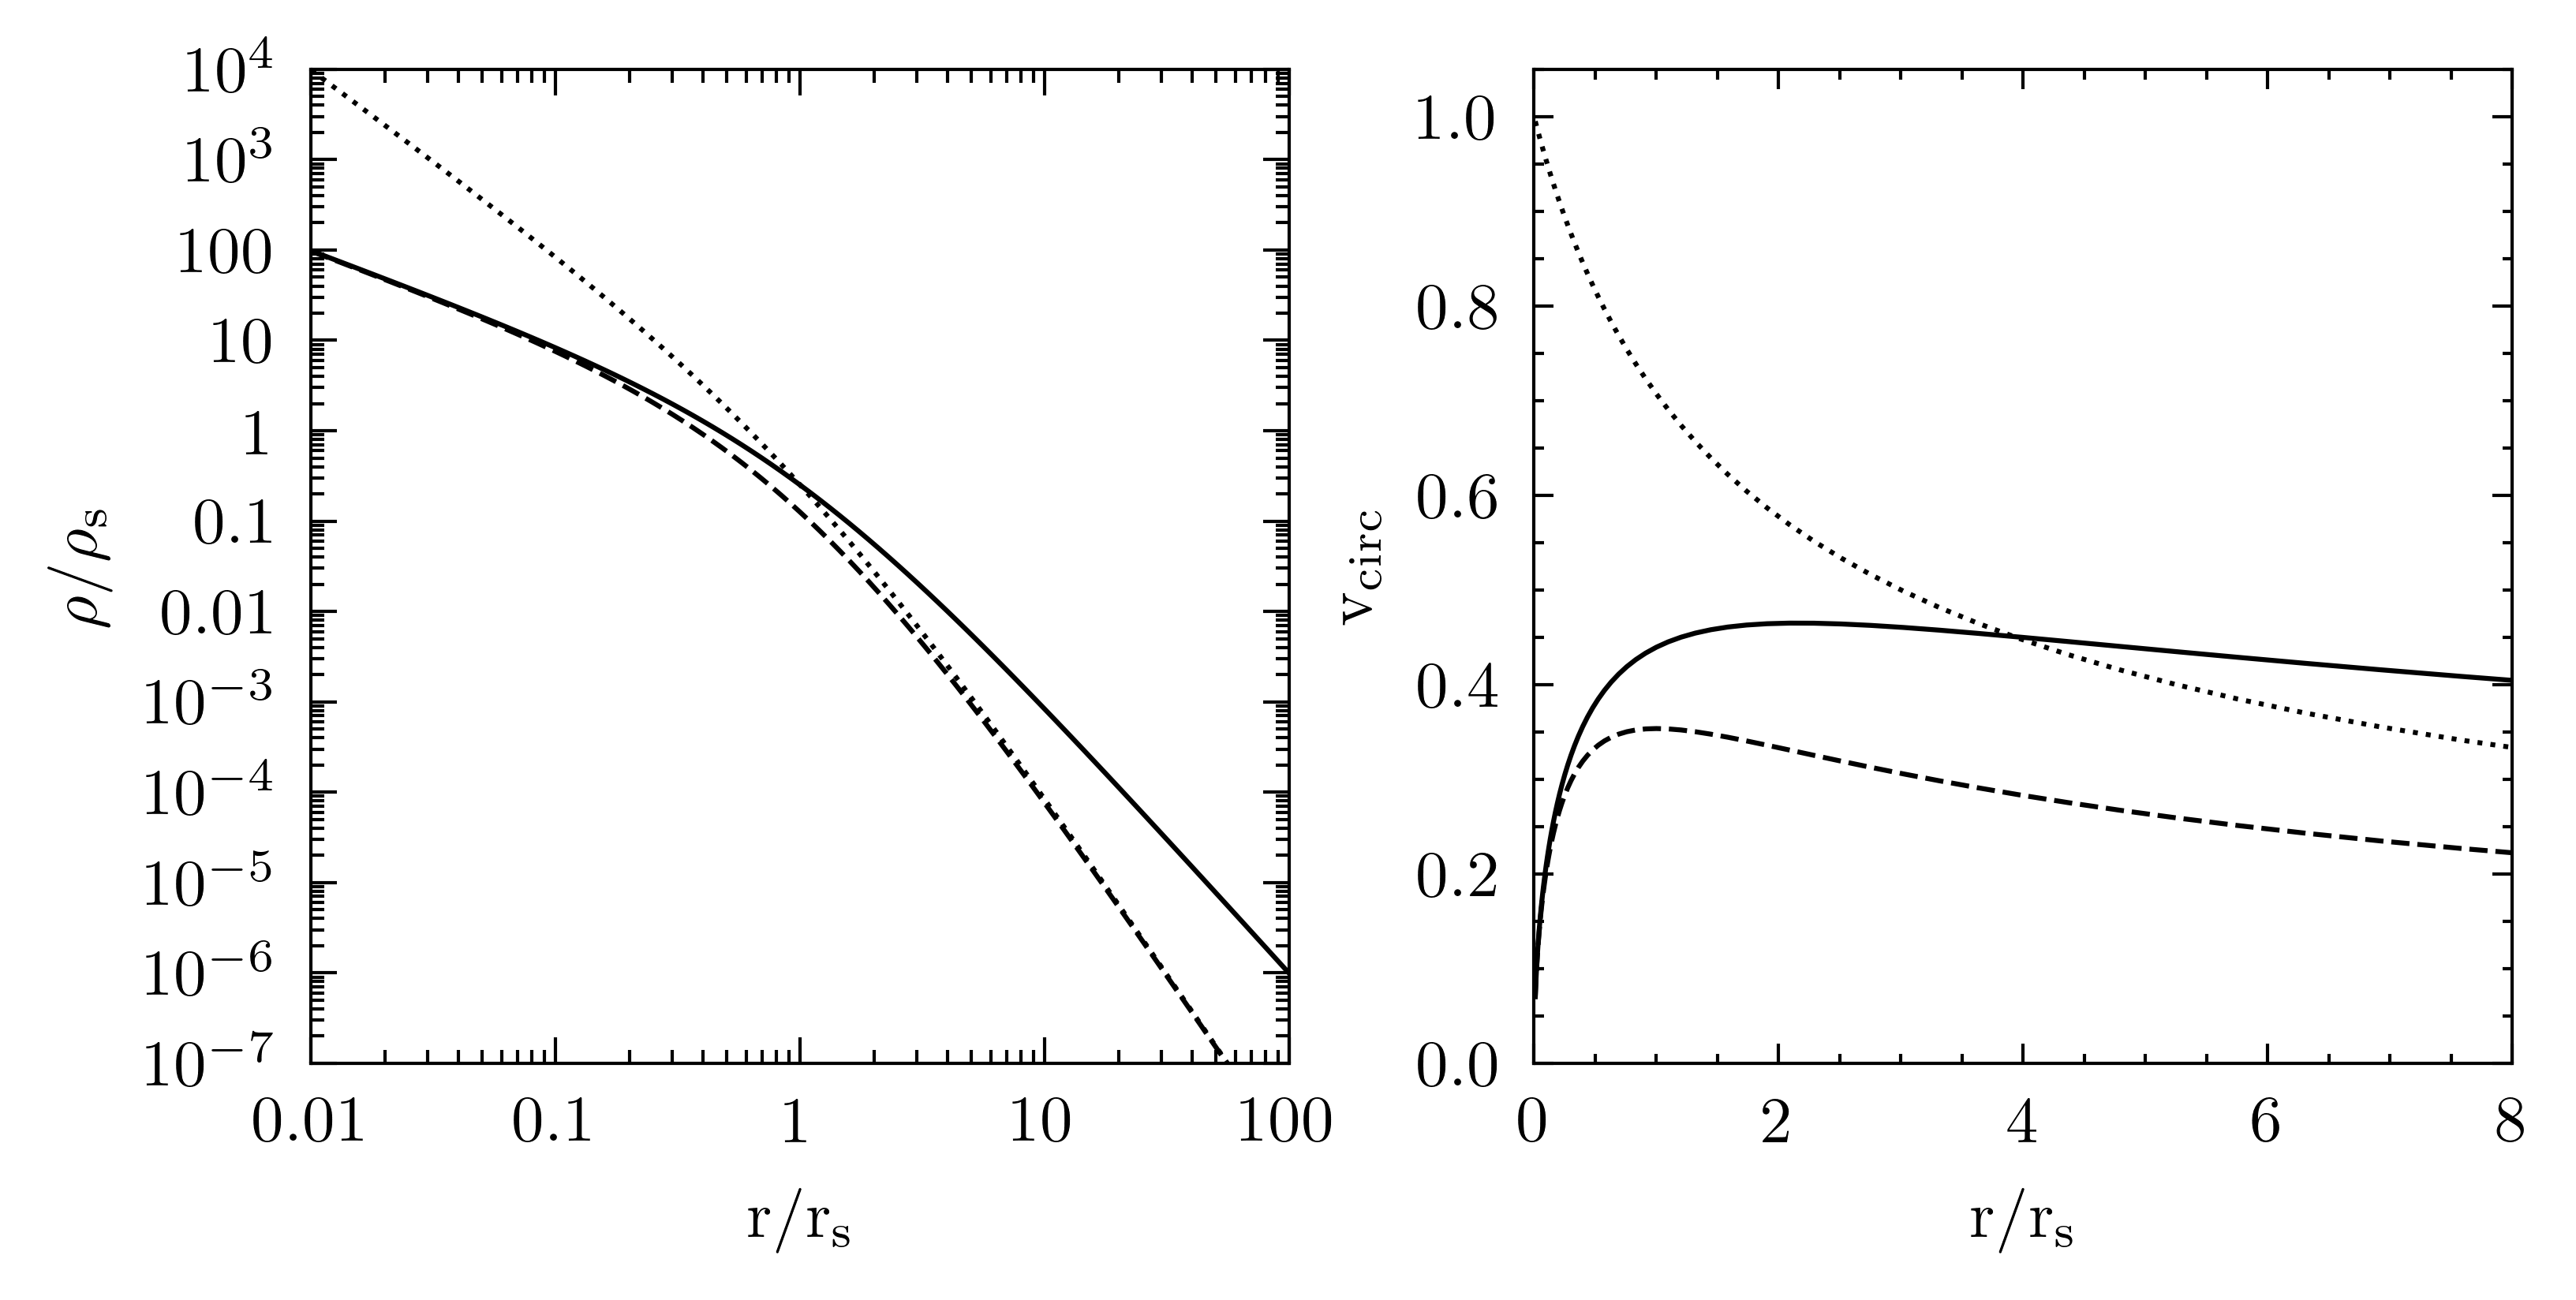

In [8]:
# plotting limits

rMin = 0.01
rMax = 100

rhoMin = 1.0e-7
rhoMax = 1.0e4

vMin = 0.
vMax = 1.05

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.25, hspace=0.0)

# left panel: density profiles

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(rMin,rMax)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.set_xticks([0.01,0.1,1,10,100])
ax1.set_xticklabels(['0.01','0.1','1','10','100'])
ax1.set_xlabel(r'r/r$_{\rm s}$',fontsize=axisFontSize)

ax1.set_ylim(rhoMin,rhoMax)
ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_yticks([1.0E-7,1.0e-6,1.0e-5,1.0e-4,1.0e-3,1.0e-2,0.1,1,10,100,1e3,1e4])
ax1.set_yticklabels(['$10^{-7}$','$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$',
                     '0.01','0.1','1','10','100','$10^3$','10$^4$'])
ax1.set_ylabel(r'$\rho/\rho_{\rm s}$',fontsize=axisFontSize)

for model in modelList:
    ax1.plot(r_rs,rho[model],ls=modelLS[model],lw=0.75,color='black',zorder=10)

# right panel: circular speed profiles

ax2.tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(0,8)
ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.xaxis.set_minor_locator(MultipleLocator(0.5))
ax2.set_xlabel(r'r/r$_{\rm s}$',fontsize=axisFontSize)

ax2.set_ylim(vMin,vMax)
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.05))
ax2.set_ylabel(r'v$_{\rm circ}$',fontsize=axisFontSize)

for model in modelList:
    ax2.plot(r_rs,v_s[model],ls=modelLS[model],lw=0.75,color='black',zorder=10)

    
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')